Data exploration of NYC trip


#Importing library

In [232]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Importing Dataset

In [233]:
train = pd.read_csv('train.csv',dtype={'id':np.object,'vender_id':np.uint8,'pickup_datetime':np.object, 
                                       'dropoff_datetime':np.object, 'passenger_count':np.uint8, 'pickup_longitude':np.object, 
                                       'pickup_latitude':np.float32,'dropoff_longitude':np.float32, 'dropoff_latitude':np.float32,
                                       'store_and_fwd_flag':'category', 'trip_duration':np.int16})
test = pd.read_csv('test.csv',dtype={'id':np.object,'vender_id':np.uint8,'pickup_datetime':np.object, 
                                       'passenger_count':np.uint8, 'pickup_longitude':np.object, 
                                       'pickup_latitude':np.float32,'dropoff_longitude':np.float32, 
                                     'dropoff_latitude':np.float32,'store_and_fwd_flag':'category' })

In [234]:
train.head()


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982154846191406,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415344238281,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979026794433594,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040283203125,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973052978515625,40.793209,-73.972923,40.782520,N,435


In [235]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
id                    1458644 non-null object
vendor_id             1458644 non-null int64
pickup_datetime       1458644 non-null object
dropoff_datetime      1458644 non-null object
passenger_count       1458644 non-null uint8
pickup_longitude      1458644 non-null object
pickup_latitude       1458644 non-null float32
dropoff_longitude     1458644 non-null float32
dropoff_latitude      1458644 non-null float32
store_and_fwd_flag    1458644 non-null category
trip_duration         1458644 non-null int16
dtypes: category(1), float32(3), int16(1), int64(1), object(4), uint8(1)
memory usage: 77.9+ MB


In [236]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625134 entries, 0 to 625133
Data columns (total 9 columns):
id                    625134 non-null object
vendor_id             625134 non-null int64
pickup_datetime       625134 non-null object
passenger_count       625134 non-null uint8
pickup_longitude      625134 non-null object
pickup_latitude       625134 non-null float32
dropoff_longitude     625134 non-null float32
dropoff_latitude      625134 non-null float32
store_and_fwd_flag    625134 non-null category
dtypes: category(1), float32(3), int64(1), object(3), uint8(1)
memory usage: 27.4+ MB


In [237]:
print(train.isnull().sum())

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64


Extract time feature for 'TimeStamp' variable

In [238]:
train['dropoff_datetime'] = pd.to_datetime(train['dropoff_datetime'])

def datetime_cv(train):
    train['pickup_datetime'] = pd.to_datetime(train['pickup_datetime'])
    train['pu_hour'] = train['pickup_datetime'].dt.hour
    train['pu_day'] = train['pickup_datetime'].dt.dayofyear
    train['pu_wday'] = train['pickup_datetime'].dt.dayofweek
    train['pu_month'] = train['pickup_datetime'].dt.month


In [239]:
datetime_cv(train)
datetime_cv(test)


In [240]:
test.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pu_hour,pu_day,pu_wday,pu_month
0,id3004672,1,2016-06-30 23:59:58,1,-73.988128662109375,40.732029,-73.990173,40.756680,N,23,182,3,6
1,id3505355,1,2016-06-30 23:59:53,1,-73.964202880859375,40.679993,-73.959808,40.655403,N,23,182,3,6
2,id1217141,1,2016-06-30 23:59:47,1,-73.9974365234375,40.737583,-73.986160,40.729523,N,23,182,3,6
3,id2150126,2,2016-06-30 23:59:41,1,-73.956069946289063,40.771900,-73.986427,40.730469,N,23,182,3,6
4,id1598245,1,2016-06-30 23:59:33,1,-73.97021484375,40.761475,-73.961510,40.755890,N,23,182,3,6


Explore time feature

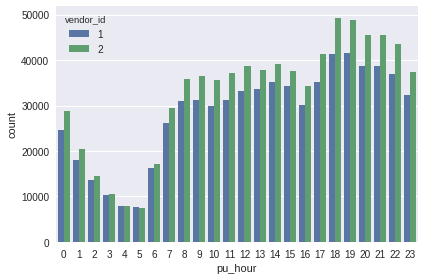

In [241]:
sns.countplot(x='pu_hour',data=train,hue='vendor_id')
plt.tight_layout()

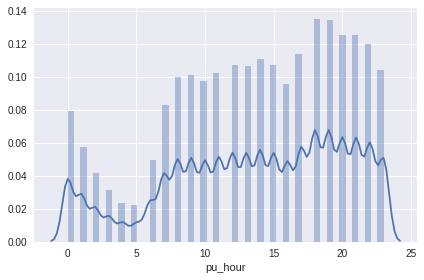

In [242]:
sns.distplot(train['pu_hour'])
plt.tight_layout()

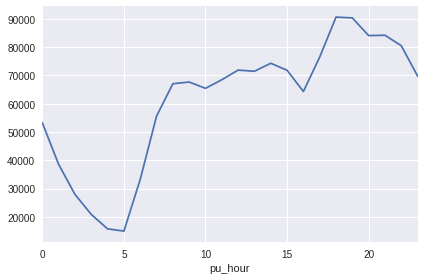

In [243]:
byHour =train.groupby('pu_hour').count()['trip_duration']
byHour.plot()
plt.tight_layout()

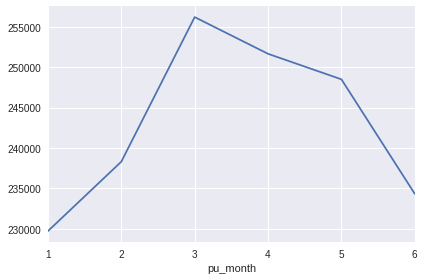

In [244]:
byMonth =train.groupby('pu_month').count()['trip_duration']
byMonth.plot()
plt.tight_layout()

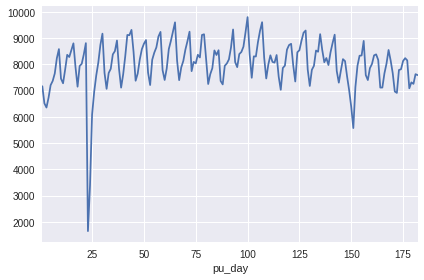

In [245]:
byDayofYear=train.groupby('pu_day').count()['trip_duration']
byDayofYear.plot()
plt.tight_layout()

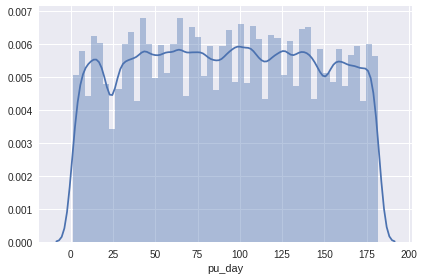

In [246]:
sns.distplot(train['pu_day'])
plt.tight_layout()

Day 25 th day of that year has less trip may because of festival 

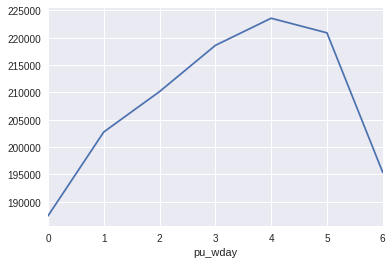

In [247]:
byWeekDay=train.groupby('pu_wday').count()['trip_duration'].plot()


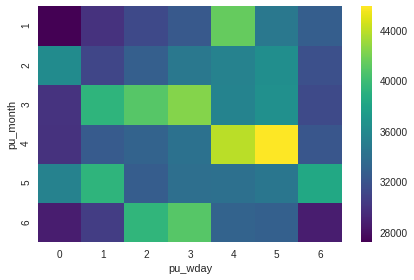

In [248]:
month = train.groupby(by=['pu_month','pu_wday']).count()['trip_duration'].unstack()
sns.heatmap(month,cmap='viridis')
plt.tight_layout()

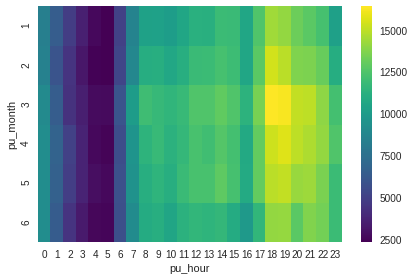

In [249]:
hourvsmonth = train.groupby(by=['pu_month','pu_hour']).count()['trip_duration'].unstack()
sns.heatmap(hourvsmonth,cmap='viridis')
plt.tight_layout()

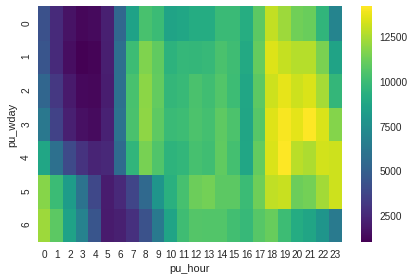

In [250]:
dayvshour = train.groupby(by=['pu_wday','pu_hour']).count()['trip_duration'].unstack()
sns.heatmap(dayvshour,cmap='viridis')
plt.tight_layout()

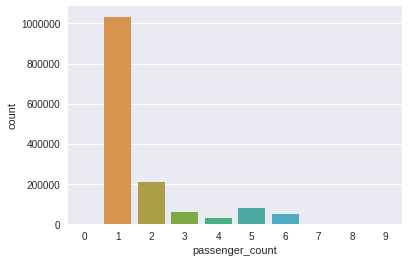

In [251]:
sns.countplot(train['passenger_count'])

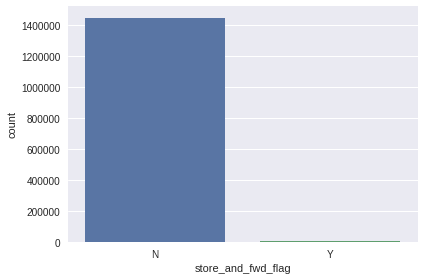

In [252]:
sns.countplot(train['store_and_fwd_flag'])
plt.tight_layout()

/home/sudhir/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:35: RuntimeWarning: overflow encountered in short_scalars
  return int(np.ceil((a.max() - a.min()) / h))


ValueError: `bins` should be a positive integer.

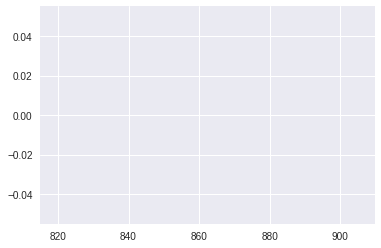

In [253]:
#sns.distplot(train['trip_duration'])

In [ ]:
#sns.jointplot(x='pickup_longitude',y='pickup_latitude',data=train,kind='scatter')

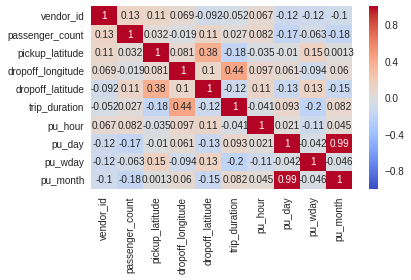

In [254]:
tc=train.loc[:100].corr()
sns.heatmap(tc,annot=True,cmap='coolwarm')
plt.tight_layout()

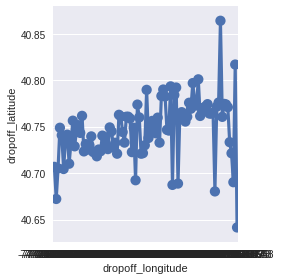

In [255]:
sns.factorplot(x='dropoff_longitude',y='dropoff_latitude',data=train.loc[:100])

In [256]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
def encoder(train):
    le=LabelEncoder()
    train['store_and_fwd_flag'] = le.fit_transform(train['store_and_fwd_flag'].values)
    #ohe = OneHotEncoder(categorical_features=train['store_and_fwd_flag'])
    #train = ohe.fit_transform(train['store_and_fwd_flag'])
    return train

In [257]:
encoder(train)
encoder(test)

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pu_hour,pu_day,pu_wday,pu_month
0,id3004672,1,2016-06-30 23:59:58,1,-73.988128662109375,40.732029,-73.990173,40.756680,0,23,182,3,6
1,id3505355,1,2016-06-30 23:59:53,1,-73.964202880859375,40.679993,-73.959808,40.655403,0,23,182,3,6
2,id1217141,1,2016-06-30 23:59:47,1,-73.9974365234375,40.737583,-73.986160,40.729523,0,23,182,3,6
3,id2150126,2,2016-06-30 23:59:41,1,-73.956069946289063,40.771900,-73.986427,40.730469,0,23,182,3,6
4,id1598245,1,2016-06-30 23:59:33,1,-73.97021484375,40.761475,-73.961510,40.755890,0,23,182,3,6
5,id0668992,1,2016-06-30 23:59:30,1,-73.991302490234375,40.749798,-73.980515,40.786549,0,23,182,3,6
6,id1765014,1,2016-06-30 23:59:15,1,-73.978309631347656,40.741550,-73.952072,40.717003,0,23,182,3,6
7,id0898117,1,2016-06-30 23:59:09,2,-74.012710571289063,40.701527,-73.986481,40.719509,0,23,182,3,6
8,id3905224,2,2016-06-30 23:58:55,2,-73.992332458496094,40.730511,-73.875618,40.875214,0,23,182,3,6
9,id1543102,2,2016-06-30 23:58:46,1,-73.993179321289063,40.748760,-73.979309,40.761311,0,23,182,3,6


In [260]:
train['store_and_fwd_flag'].values

array([0, 0, 0, ..., 0, 0, 0])

Selecting features


In [261]:
train.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pu_hour', 'pu_day', 'pu_wday', 'pu_month'],
      dtype='object')

In [262]:
test.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag', 'pu_hour', 'pu_day',
       'pu_wday', 'pu_month'],
      dtype='object')

In [263]:
X_train = train[['vendor_id','passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
        'pu_hour', 'pu_wday', 'pu_month']]
y_train =train['trip_duration']
X_test = test[['vendor_id','passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
        'pu_hour', 'pu_wday', 'pu_month']]


In [264]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model1 = lr.fit(X_train,y_train)


In [265]:
model1.coef_


array([  5.44621853e+01,   7.35282019e+00,   2.18822419e+03,
        -3.04410348e+03,  -3.71498849e+02,  -1.94608539e+03,
         2.10002316e+02,   2.94520569e+00,  -9.45881102e+00,
         2.33888342e+01])

In [266]:
y_pred = model1.predict(X_test)

In [267]:
X_test.dtypes


vendor_id               int64
passenger_count         uint8
pickup_longitude       object
pickup_latitude       float32
dropoff_longitude     float32
dropoff_latitude      float32
store_and_fwd_flag      int64
pu_hour                 int64
pu_wday                 int64
pu_month                int64
dtype: object

In [268]:
y_pred.shape

(625134,)

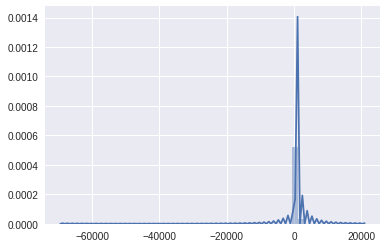

In [269]:
sns.distplot(y_pred)

In [280]:
submit = pd.DataFrame({'id':test['id'],'trip_duration':y_pred})
submit.to_csv('nyc_pred.csv',index=False)

In [279]:
submit.head()

,id,trip_duration
0,id3004672,935.503840
1,id3505355,1332.074610
2,id1217141,949.587257
3,id2150126,988.362355
4,id1598245,875.955894
